<a href="https://colab.research.google.com/github/TabithaWKariuki/KNN-and-Naive-Bayes-Classifiers/blob/main/The_Naive_Bayes_Classifier_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Programming: Naive Bayes - Exploratory Data Analysis

## 1. Defining the Question

### a) Specifying the Data Analytic Question

>  Perform classification of the testing set samples using the Naive Bayes Classifier for the following datasets[Link](https://archive.ics.uci.edu/ml/datasets/Spambase)

### b) Defining the Metric for Success

1. Download the dataset.
2. Randomly partition each dataset into two parts i.e 80 - 20  sets.
3. For the datasets, because we don't have the label for the test set, we will use the train set to create train and test data (i.e. splitting further), then perform the Naive Bayes Classifier.
4. Compute the accuracy (percentage of correct classification)
5. Report the confusion matrix of each classifier.
6. Repeat step 2 to step 4 twice, each time splitting the datasets differently i.e. 70-30, 60-40, then note the outcomes of your modeling.
7. Suggest and apply at least one of the optimization techniques that you learned earlier this week.
8. Provide further recommendations to improve classifier.

### c) Understanding the context 

Perform classification of the testing set samples using the Naive Bayes Classifier.

### d) Recording the Experimental Design

1. Define the question, the metric for success, the context, experimental design taken.
2. Read and explore the given dataset.
3. Define the appropriateness of the available data to answer the given question.
4. Find and deal with outliers, anomalies, and missing data within the dataset.
5. Perform univariate, bivariate and multivariate analysis recording your observations.
6. Perform Naive Bayes classification.
8. Challenge your solution

### e) Data Relevance

The following dataset[Link](https://archive.ics.uci.edu/ml/datasets/Spambase).have appropriate columns and data to answer the questions. They are both relevant for our analysis.

## 2. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")

## 3. Reading the Data

In [20]:
spam=pd.read_csv('spambase.data')

In [23]:
spamname=pd.read_csv('spambase.names', error_bad_lines=False)

b'Skipping line 3: expected 1 fields, saw 2\nSkipping line 4: expected 1 fields, saw 2\nSkipping line 10: expected 1 fields, saw 2\nSkipping line 11: expected 1 fields, saw 2\nSkipping line 14: expected 1 fields, saw 2\nSkipping line 17: expected 1 fields, saw 2\nSkipping line 20: expected 1 fields, saw 2\nSkipping line 24: expected 1 fields, saw 2\nSkipping line 25: expected 1 fields, saw 2\nSkipping line 28: expected 1 fields, saw 2\nSkipping line 32: expected 1 fields, saw 3\n'


In [25]:
doc=pd.read_csv('spambase.DOCUMENTATION', error_bad_lines=False)

b'Skipping line 4: expected 1 fields, saw 4\nSkipping line 5: expected 1 fields, saw 4\nSkipping line 14: expected 1 fields, saw 2\nSkipping line 19: expected 1 fields, saw 4\nSkipping line 22: expected 1 fields, saw 2\nSkipping line 30: expected 1 fields, saw 4\nSkipping line 31: expected 1 fields, saw 3\nSkipping line 35: expected 1 fields, saw 2\nSkipping line 39: expected 1 fields, saw 2\nSkipping line 43: expected 1 fields, saw 2\nSkipping line 46: expected 1 fields, saw 2\nSkipping line 47: expected 1 fields, saw 2\nSkipping line 53: expected 1 fields, saw 2\nSkipping line 54: expected 1 fields, saw 2\nSkipping line 57: expected 1 fields, saw 2\nSkipping line 60: expected 1 fields, saw 2\nSkipping line 63: expected 1 fields, saw 2\nSkipping line 67: expected 1 fields, saw 2\nSkipping line 68: expected 1 fields, saw 2\n'


## 4. Checking the Data

In [26]:
# Determining the no. of records in our dataset

spam.shape

(4600, 58)

In [27]:
# Previewing the top of our dataset

spam.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [28]:
# Previewing the bottom of our dataset

spam.tail()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
4595,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,...,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4596,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4597,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4598,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,...,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4599,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [29]:
# Checking whether each column has an appropriate datatype

spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4600 non-null   float64
 1   0.64    4600 non-null   float64
 2   0.64.1  4600 non-null   float64
 3   0.1     4600 non-null   float64
 4   0.32    4600 non-null   float64
 5   0.2     4600 non-null   float64
 6   0.3     4600 non-null   float64
 7   0.4     4600 non-null   float64
 8   0.5     4600 non-null   float64
 9   0.6     4600 non-null   float64
 10  0.7     4600 non-null   float64
 11  0.64.2  4600 non-null   float64
 12  0.8     4600 non-null   float64
 13  0.9     4600 non-null   float64
 14  0.10    4600 non-null   float64
 15  0.32.1  4600 non-null   float64
 16  0.11    4600 non-null   float64
 17  1.29    4600 non-null   float64
 18  1.93    4600 non-null   float64
 19  0.12    4600 non-null   float64
 20  0.96    4600 non-null   float64
 21  0.13    4600 non-null   float64
 22  

In [30]:
# Checking columns names in dataset

spam.columns

Index(['0', '0.64', '0.64.1', '0.1', '0.32', '0.2', '0.3', '0.4', '0.5', '0.6',
       '0.7', '0.64.2', '0.8', '0.9', '0.10', '0.32.1', '0.11', '1.29', '1.93',
       '0.12', '0.96', '0.13', '0.14', '0.15', '0.16', '0.17', '0.18', '0.19',
       '0.20', '0.21', '0.22', '0.23', '0.24', '0.25', '0.26', '0.27', '0.28',
       '0.29', '0.30', '0.31', '0.32.2', '0.33', '0.34', '0.35', '0.36',
       '0.37', '0.38', '0.39', '0.40', '0.41', '0.42', '0.778', '0.43', '0.44',
       '3.756', '61', '278', '1'],
      dtype='object')

## 5. External Data Source Validation

I made sure my data matches something outside of the dataset link. The measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset.

### a.Validation

## 6. Tidying the Dataset

In [31]:
# Identifying the Missing Data

spam.isnull().sum()

0         0
0.64      0
0.64.1    0
0.1       0
0.32      0
0.2       0
0.3       0
0.4       0
0.5       0
0.6       0
0.7       0
0.64.2    0
0.8       0
0.9       0
0.10      0
0.32.1    0
0.11      0
1.29      0
1.93      0
0.12      0
0.96      0
0.13      0
0.14      0
0.15      0
0.16      0
0.17      0
0.18      0
0.19      0
0.20      0
0.21      0
0.22      0
0.23      0
0.24      0
0.25      0
0.26      0
0.27      0
0.28      0
0.29      0
0.30      0
0.31      0
0.32.2    0
0.33      0
0.34      0
0.35      0
0.36      0
0.37      0
0.38      0
0.39      0
0.40      0
0.41      0
0.42      0
0.778     0
0.43      0
0.44      0
3.756     0
61        0
278       0
1         0
dtype: int64

Our data has no null values.

In [32]:
# Checking for duplicates

spam.duplicated().sum()

391

In [33]:
# Dropping duplicates

spam.drop_duplicates(inplace=True)

In [34]:
# Checking again for duplicates

spam.duplicated().sum()

0

In [36]:
# Checking and dealing with anomalies and outliers using quantiles

Q1 = spam.quantile(0.25)
Q3 = spam.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range 
Newspam = spam[~((spam < (Q1 - 1.5 * IQR)) | (spam > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
print(Newspam.shape)

# Printing the shape of our old dataset
print(spam.shape)

(114, 58)
(4209, 58)


Ther are alot of outliers in our data and it causes a great reduction in our data.We will not be dropping the outliers.

## 7. Exploratory Analysis

Univariate Analysis

In [37]:
# summarry statistics for our data

spam.describe()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.00000,4209.000000
mean,0.104391,0.112530,0.291390,0.063093,0.325322,0.096679,0.117503,0.108026,0.091882,0.248479,...,0.040413,0.144082,0.017380,0.281018,0.076075,0.045809,5.384282,52.137800,291.18508,0.398670
std,0.300036,0.454241,0.515752,1.352647,0.687887,0.276059,0.397327,0.410328,0.282174,0.656705,...,0.252562,0.274280,0.105743,0.843387,0.239734,0.435976,33.151287,199.605834,618.72831,0.489683
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627000,7.000000,40.00000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.073000,0.000000,0.016000,0.000000,0.000000,2.297000,15.000000,101.00000,0.000000
75%,0.000000,0.000000,0.440000,0.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.190000,...,0.000000,0.194000,0.000000,0.331000,0.053000,0.000000,3.706000,44.000000,273.00000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.00000,1.000000


Bivariate Analysis

In [45]:
# Finding correlation

spam.corr()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,1.000000,0.034114,0.063267,0.005384,0.021740,0.055040,0.011037,-0.004392,0.103818,0.040799,...,-0.027262,-0.019680,-0.034798,0.059236,0.101934,-0.009158,0.044779,0.059132,0.084126,0.129321
0.64,0.034114,1.000000,0.027609,-0.008936,0.036983,0.005623,0.077468,0.013781,0.053525,0.184441,...,0.014782,-0.028209,-0.019394,0.031702,0.044449,0.030702,0.029373,0.053866,0.034601,0.100346
0.64.1,0.063267,0.027609,1.000000,-0.019895,0.065681,0.066608,0.028630,0.007263,0.077618,0.025201,...,-0.036754,-0.024462,-0.035780,0.097231,0.073000,-0.004503,0.095684,0.092511,0.051967,0.172193
0.1,0.005384,-0.008936,-0.019895,1.000000,0.000256,-0.009167,0.014286,0.003798,-0.001044,-0.003849,...,-0.000030,-0.011450,-0.007516,-0.003861,0.008269,0.000133,0.005754,0.022106,0.023784,0.056407
0.32,0.021740,0.036983,0.065681,0.000256,1.000000,0.041392,0.135958,0.023410,0.014482,0.027232,...,-0.035049,-0.054583,-0.027988,0.019205,0.040696,0.002144,0.050832,0.042985,-0.010498,0.230117
0.2,0.055040,0.005623,0.066608,-0.009167,0.041392,1.000000,0.046844,0.079683,0.097012,0.010068,...,-0.021758,-0.011628,-0.016743,0.058173,0.105903,0.020405,-0.013559,0.065714,0.063402,0.212455
0.3,0.011037,0.077468,0.028630,0.014286,0.135958,0.046844,1.000000,0.033675,0.049216,0.055670,...,-0.034092,-0.061357,-0.029478,0.051036,0.067215,0.049300,0.039171,0.050828,-0.017082,0.334605
0.4,-0.004392,0.013781,0.007263,0.003798,0.023410,0.079683,0.033675,1.000000,0.106872,0.079023,...,-0.028986,-0.042785,-0.021393,0.029069,0.053550,-0.008128,0.009974,0.035606,0.036894,0.200780
0.5,0.103818,0.053525,0.077618,-0.001044,0.014482,0.097012,0.049216,0.106872,1.000000,0.123341,...,-0.015016,-0.037420,0.017308,0.035985,0.152436,-0.002084,0.110786,0.166304,0.233199,0.221591
0.6,0.040799,0.184441,0.025201,-0.003849,0.027232,0.010068,0.055670,0.079023,0.123341,1.000000,...,0.006757,-0.005008,0.003785,0.031657,0.077378,0.034473,0.073125,0.101552,0.078587,0.131822


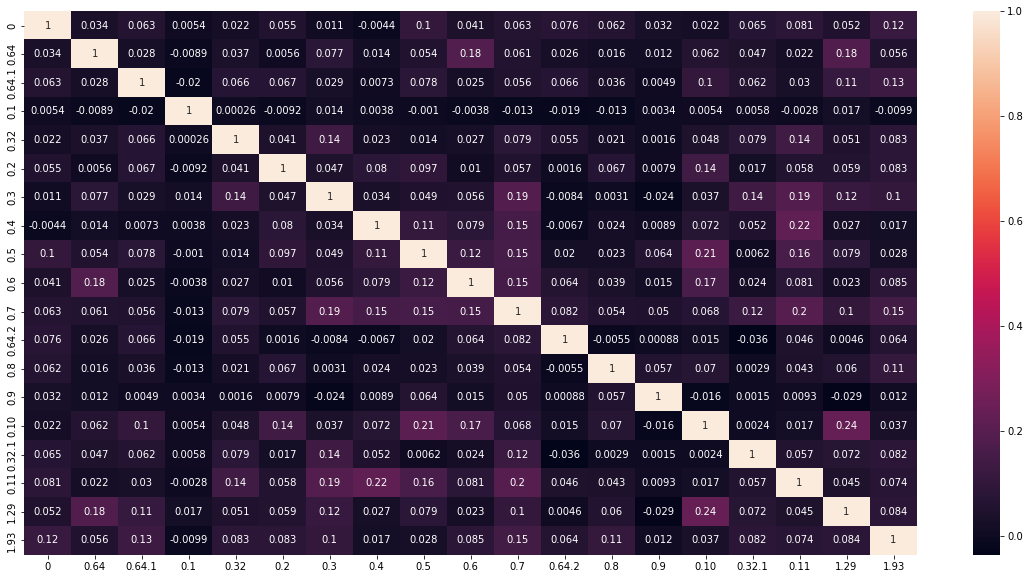

In [47]:
# heatmap to show correlation between variables on the first rows

col=spam[['0', '0.64', '0.64.1', '0.1', '0.32', '0.2', '0.3', '0.4', '0.5', '0.6',
       '0.7', '0.64.2', '0.8', '0.9', '0.10', '0.32.1', '0.11', '1.29', '1.93']]

corr = col.corr() 
plt.figure(figsize = (20,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
plt.show()

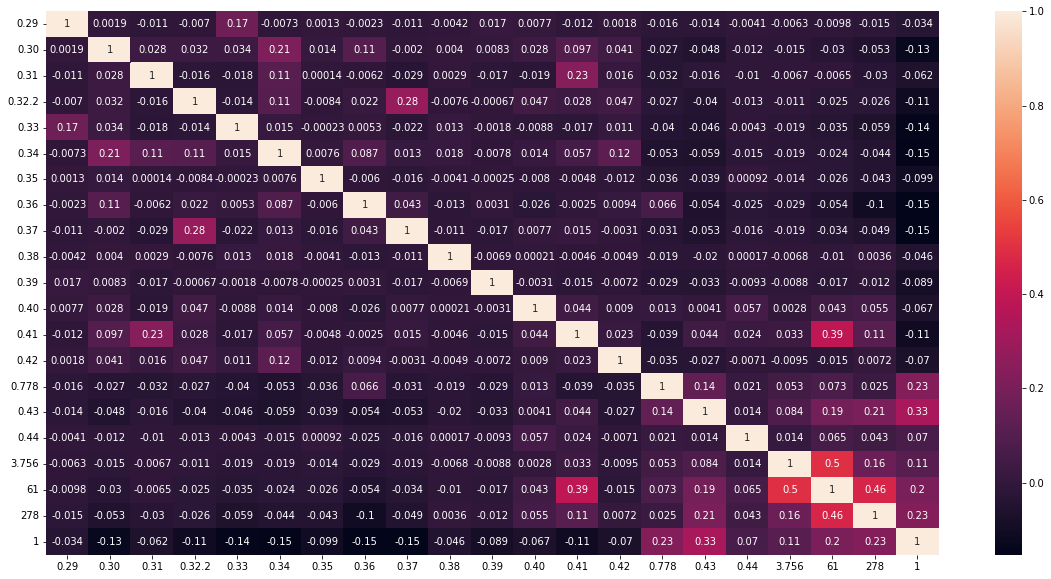

In [48]:
# heatmap to show correlation between variables on the last rows

col=spam[['0.29', '0.30', '0.31', '0.32.2', '0.33', '0.34', '0.35', '0.36',
       '0.37', '0.38', '0.39', '0.40', '0.41', '0.42', '0.778', '0.43', '0.44',
       '3.756', '61', '278', '1']]

corr = col.corr() 
plt.figure(figsize = (20,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
plt.show()

## 8. Implementing the Solution

**80-20**

In [78]:
# Splitting to features and labels 

X = spam.drop('1',axis=1)
y = spam['1']

In [79]:
# Splitting our data into a training set and a test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6) 

In [80]:
# Training our model

clf = GaussianNB()  
model = clf.fit(X_train, y_train) 

In [81]:
# Predicting our test predictors

predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

0.8242280285035629


In [82]:
# Getting the confusion matrix 

from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

[[383 132]
 [ 16 311]]
              precision    recall  f1-score   support

           0       0.96      0.74      0.84       515
           1       0.70      0.95      0.81       327

    accuracy                           0.82       842
   macro avg       0.83      0.85      0.82       842
weighted avg       0.86      0.82      0.83       842



Our model gives us 82.4% accuracy with a 80 20 split

**70-30**

In [73]:
# Splitting our data into a training set and a test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6) 

In [75]:
# Training our model

clf = GaussianNB()  
model = clf.fit(X_train, y_train)

In [76]:
# Predicting our test predictors

predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

0.8202692003167062


In [77]:
# Getting the confusion matrix 

from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

[[555 203]
 [ 24 481]]
              precision    recall  f1-score   support

           0       0.96      0.73      0.83       758
           1       0.70      0.95      0.81       505

    accuracy                           0.82      1263
   macro avg       0.83      0.84      0.82      1263
weighted avg       0.86      0.82      0.82      1263



We have 82% accuracy of our model with a 70 30 split

**60-40**

In [69]:
# Splitting our data into a training set and a test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=6) 

In [70]:
# Training our model

clf = GaussianNB()  
model = clf.fit(X_train, y_train)

In [71]:
# Predicting our test predictors

predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

0.830166270783848


In [72]:
# Getting the confusion matrix 

from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

[[746 257]
 [ 29 652]]
              precision    recall  f1-score   support

           0       0.96      0.74      0.84      1003
           1       0.72      0.96      0.82       681

    accuracy                           0.83      1684
   macro avg       0.84      0.85      0.83      1684
weighted avg       0.86      0.83      0.83      1684



We have a 83% accuracy with a 60 40 split.

## 9. Challenging the solution

In [83]:
# Reviewing the Solution by using another modeling method the Multinomial Naive bayes classifier

# Splitting our data into a training set and a test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=6) 

In [84]:
# Fitting our model 
# Then, all that we have to do is initialize the Naive Bayes Classifier and fit the data. 
# For text classification problems, the Multinomial Naive Bayes Classifier is well-suited
# 
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(X_train, y_train)

In [85]:
# Evaluating the Model
# Once we have put together our classifier, we can evaluate its performance in the testing set
# 
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

0.7927553444180523


In [86]:
# Getting the confusion matrix 

from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

[[741 262]
 [ 27 654]]
              precision    recall  f1-score   support

           0       0.96      0.74      0.84      1003
           1       0.71      0.96      0.82       681

    accuracy                           0.83      1684
   macro avg       0.84      0.85      0.83      1684
weighted avg       0.86      0.83      0.83      1684



With a 60 40 split and using the multinomial Naive Bayes classifier we get a much less accuracy score of 79.3%.

## 10. Conclusion

> Most ideal classifier would be the Gaussian Naive Bayes Classifier since it is easy to use and has a higher accuracy score of 83% with 60 40 split.



## 11. FollowUp Questions

### a). Did we have the right data? Yes

### b). Do we need other data to answer our question? No. The data was sufficient for modeling and analysis.

### c). Did we have the right question? Yes. Our model has 83% accuracy to answer the questions.